In [17]:
# import required libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
# for 3d plot
from mpl_toolkits import mplot3d
# Import dataset with pandas
df = pd.read_csv ("4907/set_D3.csv")

In [18]:
# remove the label 
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q 4.1   244 non-null    int64
 1   Q 4.2   244 non-null    int64
 2   Q 4.4   244 non-null    int64
 3   Q 4.5   244 non-null    int64
 4   Q 4.6   244 non-null    int64
 5   Q 4.7   244 non-null    int64
 6   Q 5.1   244 non-null    int64
 7   Q 5.2   244 non-null    int64
 8   Q 5.3   244 non-null    int64
 9   Q 7.1   244 non-null    int64
 10  Q 7.2   244 non-null    int64
 11  Q 7.3   244 non-null    int64
 12  Q 8.4   244 non-null    int64
 13  Q 8.6   244 non-null    int64
 14  Q 8.8   244 non-null    int64
 15  Q 9.1   244 non-null    int64
 16  Q 12.1  244 non-null    int64
 17  Q 12.2  244 non-null    int64
dtypes: int64(18)
memory usage: 34.4 KB


In [19]:
# standardize the data features onto unit scale 
x = np.array(df)
scaler = StandardScaler()
print(scaler.fit(x))
print(scaler.mean_)
x = scaler.transform(x)
print(scaler.transform(x))

StandardScaler()
[3.45491803 3.45491803 3.45491803 3.45491803 3.45491803 3.45491803
 3.31557377 3.31557377 3.31557377 3.45491803 3.45491803 3.37704918
 2.39754098 2.39754098 2.39754098 2.39754098 2.39754098 2.39754098]
[[-6.72601383 -6.72601383 -6.72601383 ... -2.34821375 -2.34821375
  -2.34821375]
 [-6.72601383 -6.72601383 -6.72601383 ... -2.34821375 -2.34821375
  -2.34821375]
 [-6.72601383 -6.72601383 -6.72601383 ... -2.34821375 -2.34821375
  -2.34821375]
 ...
 [-6.72601383 -6.72601383 -6.72601383 ... -5.38158615 -5.38158615
  -5.38158615]
 [-6.72601383 -6.72601383 -6.72601383 ... -2.34821375 -2.34821375
  -2.34821375]
 [-4.14411523 -4.14411523 -4.14411523 ... -5.38158615 -5.38158615
  -5.38158615]]


In [20]:
# add PCA decomposition to 2 variables 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principals = np.array(principalDF)
print(principalDF)

     principal component 1  principal component 2
0                 0.701936               3.035435
1                 0.701936               3.035435
2                 0.701936               3.035435
3                 0.701936               3.035435
4                -4.101335               0.856195
..                     ...                    ...
239              -4.101335               0.856195
240              -4.101335               0.856195
241               2.890136              -0.218348
242               0.701936               3.035435
243              -0.538818              -2.970709

[244 rows x 2 columns]


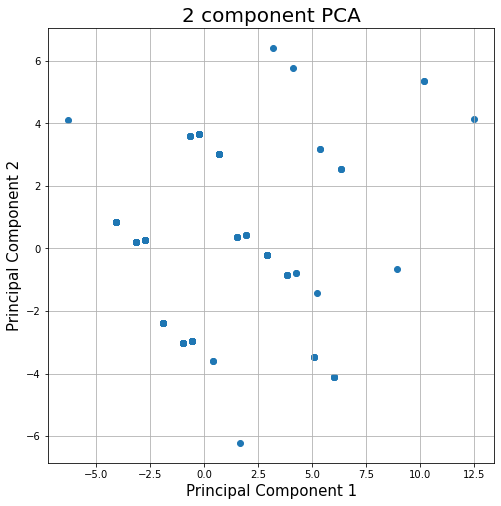

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20) 
ax.scatter(principals[:,0], principals[:,1])
ax.grid()

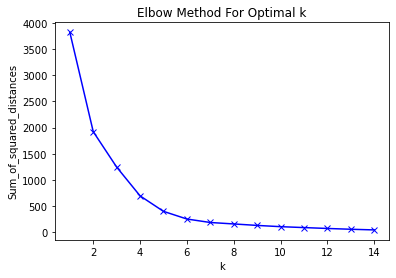

In [22]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principals)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
# Apply Kmeans using 3 clusters 
kmeans = KMeans(n_clusters=3)
kmeans.fit(principals)
# Print the centroid locations
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-1.00984521 -2.87653038]
 [-3.23297074  1.20470672]
 [ 3.13651576  0.50411971]]
[2 2 2 2 1 2 0 2 2 2 2 2 1 2 2 2 2 1 2 2 0 1 1 1 0 2 1 2 0 0 2 1 1 0 0 2 1
 2 1 1 2 1 1 1 1 2 0 2 0 2 2 2 2 1 1 2 0 0 1 2 1 1 2 1 0 1 1 1 2 2 1 1 1 2
 2 0 0 1 0 2 2 0 2 0 1 0 1 1 1 2 2 1 1 2 1 2 2 0 2 1 0 0 2 2 2 1 1 2 2 2 2
 1 1 2 1 0 1 1 2 1 1 2 1 2 2 1 2 1 0 2 0 1 0 2 2 0 2 2 2 0 1 1 0 1 2 0 1 2
 1 2 0 1 0 1 2 1 0 1 0 0 2 0 0 2 2 1 0 0 2 2 2 2 1 2 1 2 2 0 1 0 1 2 2 2 0
 0 1 0 2 2 1 0 1 1 2 2 1 1 0 1 2 0 2 0 2 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2 2 2
 2 2 2 0 2 0 1 2 0 0 2 1 0 2 2 0 1 1 1 2 2 0]


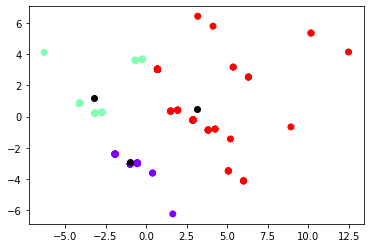

In [24]:
# Black points are centroids, colored points are all values closest to a centroid
# C = value of which centroid a datapoint belongs to, each C has a unique color, represented on the graph via cmap
plt.scatter(principals[:,0],principals[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

For n_clusters = 2 The average silhouette_score is : 0.5268860175595246
For n_clusters = 3 The average silhouette_score is : 0.5835979963079461
For n_clusters = 4 The average silhouette_score is : 0.723346728048933
For n_clusters = 5 The average silhouette_score is : 0.7646235799106939
For n_clusters = 6 The average silhouette_score is : 0.7950485033115214
For n_clusters = 7 The average silhouette_score is : 0.8072010292520878
For n_clusters = 8 The average silhouette_score is : 0.8132922277957009
For n_clusters = 9 The average silhouette_score is : 0.8190770926488391
For n_clusters = 10 The average silhouette_score is : 0.8321690533660919
For n_clusters = 11 The average silhouette_score is : 0.8352982195874679
For n_clusters = 12 The average silhouette_score is : 0.8443824550524984
For n_clusters = 13 The average silhouette_score is : 0.8473450780086752
For n_clusters = 20 The average silhouette_score is : 0.9134894872140855


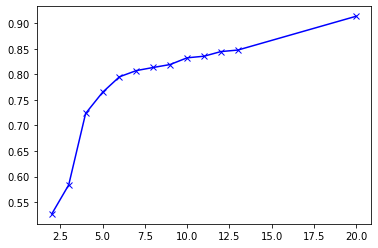

In [25]:
# Silhoutte method
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20]
silhouette_scores = [0]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(principals)
    silhouette_avg = silhouette_score(principals, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
silhouette_scores.pop(0)
plt.plot(range_n_clusters, silhouette_scores, 'bx-')

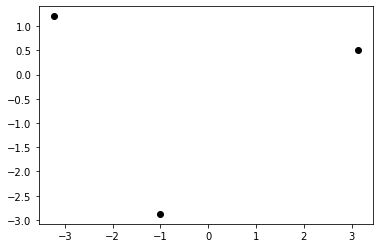

In [26]:
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [27]:
# add PCA decomposition to 2 variables 
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(x)
principalDF3 = pd.DataFrame(data = principalComponents3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principals3 = np.array(principalDF3)
print(principalDF3)
km = KMeans(n_clusters=3)
km.fit(principals3)
print(km.labels_)
print(km.cluster_centers_)

     principal component 1  principal component 2  principal component 3
0                 0.701936               3.035435               1.561467
1                 0.701936               3.035435               1.561467
2                 0.701936               3.035435               1.561467
3                 0.701936               3.035435               1.561467
4                -4.101335               0.856195              -0.473733
..                     ...                    ...                    ...
239              -4.101335               0.856195              -0.473733
240              -4.101335               0.856195              -0.473733
241               2.890136              -0.218348              -0.119220
242               0.701936               3.035435               1.561467
243              -0.538818              -2.970709               0.751358

[244 rows x 3 columns]
[1 1 1 1 2 1 0 1 1 1 1 1 2 1 1 1 1 2 1 1 0 2 2 2 0 1 2 1 0 0 1 2 2 0 0 1 2
 1 2 2 1 2 2 2 2 1 0 1 0 

Text(2.46110258, 2.63606279, '(2.46110258,  2.63606279,  0.21743436)')

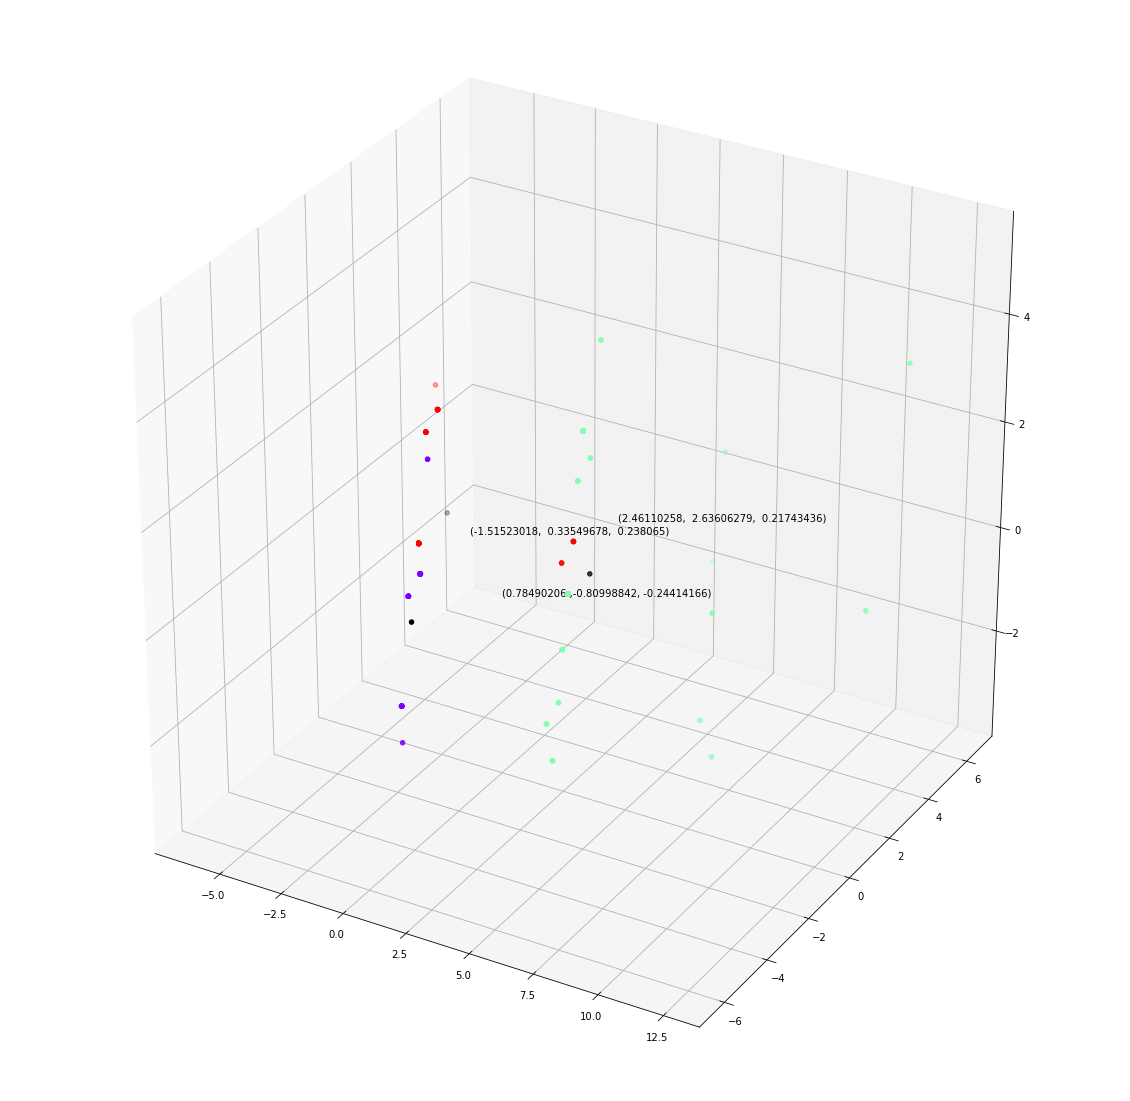

In [28]:
# testing 3d plot
plt.figure(figsize=(20,20))
test3D = plt.axes(projection='3d')
test3D.scatter3D(principals3[:,0],principals3[:,1],principals3[:,2], c=km.labels_, cmap='rainbow')
test3D.scatter3D(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], km.cluster_centers_[:,2], color='black')
# annotation (MANUALLY ADDED CENTROID POSITIONS FROM km.cluster_centers_)
test3D.text(0.78490206 ,-0.80998842, -0.24414166, "(0.78490206 ,-0.80998842, -0.24414166)", color='black')
test3D.text(-1.51523018,  0.33549678,  0.238065 , "(-1.51523018,  0.33549678,  0.238065)", color='black')
test3D.text(2.46110258,  2.63606279,  0.21743436, "(2.46110258,  2.63606279,  0.21743436)", color='black')

In [29]:
# print (pca.inverse_transform(kmeans.cluster_centers_))
print (kmeans.cluster_centers_[0])

[-1.00984521 -2.87653038]


In [30]:
# Identify the closest points to one centroid and store the index of said point within an array
# Currently manual, have to identify a way to automate this process for X number of centroids identified by the user 
# requires import from sklearn.metrics import pairwise_distances_argmin_min
centroid_1 = np.array(kmeans.cluster_centers_[0])
centroid_2 = np.array(kmeans.cluster_centers_[1])
centroid_3 = np.array(kmeans.cluster_centers_[2])
centroid_1 = centroid_1.reshape(1,-1)
centroid_2 = centroid_2.reshape(1,-1)
centroid_3 = centroid_3.reshape(1,-1)
closest_1 = pairwise_distances_argmin_min(centroid_1, principals)
closest_2 = pairwise_distances_argmin_min(centroid_2, principals)
closest_3 = pairwise_distances_argmin_min(centroid_3, principals)

In [31]:
# Using the index of previously identified points, output the corresponding index from the original dataset
# Here the first index (0) is used since that is the point closest to the centroid AFTER standardization and PCA decomposition 
print(principals[closest_1[0]])
test_points = np.array(df)
print(test_points[closest_1[0]])
print(principals[closest_2[0]])
print(test_points[closest_2[0]])
print(principals[closest_3[0]])
print(test_points[closest_3[0]])

[[-0.97224925 -3.03459436]]
[[4 4 4 4 4 4 3 3 3 4 4 4 2 2 2 2 2 2]]
[[-4.1013349   0.85619475]]
[[4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3]]
[[ 2.89013574 -0.21834775]]
[[3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2]]


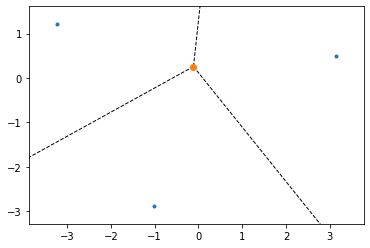

In [33]:
#voronoi
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(kmeans.cluster_centers_)
fig = voronoi_plot_2d(vor)
plt.show()